In [ ]:
import zipfile
import os
import gdown

# Original Google Drive URL
drive_url = 'https://drive.google.com/uc?id=1vvonWzxOjeCM3QTkuphwmY92HTAaSVxm'

# Define the local path for the downloaded zip file
zip_file_name = 'aadhar_data.zip'
zip_file_path = os.path.join('/content', zip_file_name)

extraction_path = '/content/aadhar_data'

# Create the directory if it doesn't exist
os.makedirs(extraction_path, exist_ok=True)

# Download the file from Google Drive
print(f"Downloading '{drive_url}' to '{zip_file_path}'...")
gdown.download(drive_url, zip_file_path, quiet=False)
print("Download complete.")

# Unzip the file
print(f"Unzipping '{zip_file_path}' to '{extraction_path}'...")
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print(f"'{zip_file_name}' unzipped to '{extraction_path}'")

Downloading...
From: https://drive.google.com/uc?id=1vvonWzxOjeCM3QTkuphwmY92HTAaSVxm
To: /content/aadhar_data.zip
100%|██████████| 6.86M/6.86M [00:00<00:00, 41.6MB/s]


Download complete.
Unzipping '/content/aadhar_data.zip' to '/content/aadhar_data'...
'aadhar_data.zip' unzipped to '/content/aadhar_data'


In [ ]:
# List the contents of the extracted directory
print("Contents of the extracted directory:")
for root, dirs, files in os.walk(extraction_path):
    for name in files:
        print(os.path.join(root, name))
    for name in dirs:
        print(os.path.join(root, name))

Contents of the extracted directory:
/content/aadhar_data/api_data_aadhar_enrolment
/content/aadhar_data/api_data_aadhar_enrolment/api_data_aadhar_enrolment_500000_1000000.csv
/content/aadhar_data/api_data_aadhar_enrolment/api_data_aadhar_enrolment_0_500000.csv
/content/aadhar_data/api_data_aadhar_enrolment/api_data_aadhar_enrolment_1000000_1006029.csv


In [ ]:
# List the contents of the extracted directory
print("Contents of the extracted directory:")
for root, dirs, files in os.walk(extraction_path):
    for name in files:
        print(os.path.join(root, name))
    for name in dirs:
        print(os.path.join(root, name))

Contents of the extracted directory:
/content/aadhar_data/api_data_aadhar_enrolment
/content/aadhar_data/api_data_aadhar_enrolment/api_data_aadhar_enrolment_500000_1000000.csv
/content/aadhar_data/api_data_aadhar_enrolment/api_data_aadhar_enrolment_0_500000.csv
/content/aadhar_data/api_data_aadhar_enrolment/api_data_aadhar_enrolment_1000000_1006029.csv


In [ ]:
import pandas as pd

# Assuming the first file listed is representative, load it into a DataFrame
file_path = '/content/aadhar_data/api_data_aadhar_enrolment/api_data_aadhar_enrolment_0_500000.csv'
df = pd.read_csv(file_path)

print(f"Successfully loaded '{file_path}'")

Successfully loaded '/content/aadhar_data/api_data_aadhar_enrolment/api_data_aadhar_enrolment_0_500000.csv'


### First 5 rows of the DataFrame:

In [ ]:
display(df.head())

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


### DataFrame Information (columns, non-null counts, dtypes):

In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            500000 non-null  object
 1   state           500000 non-null  object
 2   district        500000 non-null  object
 3   pincode         500000 non-null  int64 
 4   age_0_5         500000 non-null  int64 
 5   age_5_17        500000 non-null  int64 
 6   age_18_greater  500000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 26.7+ MB


None

### Descriptive Statistics for numerical columns:

In [ ]:
display(df.describe())

,pincode,age_0_5,age_5_17,age_18_greater
count,500000.000000,500000.000000,500000.000000,500000.000000
mean,519204.051054,4.040812,2.315682,0.245558
std,206793.322085,24.417921,20.191196,4.438557
min,100000.000000,0.000000,0.000000,0.000000
25%,362229.000000,1.000000,0.000000,0.000000
50%,517131.000000,2.000000,0.000000,0.000000
75%,712139.000000,3.000000,1.000000,0.000000
max,855456.000000,2688.000000,1812.000000,855.000000


# Task
Combine the Aadhar enrolment data from the CSV files located at `/content/aadhar_data/api_data_aadhar_enrolment/api_data_aadhar_enrolment_0_500000.csv`, `/content/aadhar_data/api_data_aadhar_enrolment/api_data_aadhar_enrolment_500000_1000000.csv`, and `/content/aadhar_data/api_data_aadhar_enrolment/api_data_aadhar_enrolment_1000000_1006029.csv` to calculate the total enrolment (sum of 'age_0_5', 'age_5_17', and 'age_18_greater') for each state, and then determine the average of these total enrolments per state. Visualize this state-wise average enrolment data using a bar chart with appropriate labels and a legend, and finally, summarize the key insights derived from the visualization.

## Combine all data files

### Subtask:
Load all available CSV files into a single pandas DataFrame to ensure all data is considered for the analysis.


**Reasoning**:
I will create an empty list, define the file paths, loop through each file to read it into a DataFrame and append it to the list, then concatenate all DataFrames into a single `combined_df` and display its first 5 rows to verify the merge.



In [ ]:
import pandas as pd

# 1. Create an empty list to store individual DataFrames
dfs = []

# 2. Construct the full file paths for each of the three CSV files
file_paths = [
    '/content/aadhar_data/api_data_aadhar_enrolment/api_data_aadhar_enrolment_0_500000.csv',
    '/content/aadhar_data/api_data_aadhar_enrolment/api_data_aadhar_enrolment_500000_1000000.csv',
    '/content/aadhar_data/api_data_aadhar_enrolment/api_data_aadhar_enrolment_1000000_1006029.csv'
]

# 3. Loop through each file path, read the CSV file into a pandas DataFrame, and append it to the list
for path in file_paths:
    df_temp = pd.read_csv(path)
    dfs.append(df_temp)

# 4. Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

print(f"Successfully combined {len(file_paths)} files into a single DataFrame.")
print(f"Combined DataFrame has {combined_df.shape[0]} rows and {combined_df.shape[1]} columns.")

# 5. Display the first 5 rows of combined_df to verify the merge
display(combined_df.head())

Successfully combined 3 files into a single DataFrame.
Combined DataFrame has 1006029 rows and 7 columns.


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


## Calculate Total Enrolment by State

### Subtask:
Group the combined DataFrame by 'state' and calculate the sum of 'age_0_5', 'age_5_17', and 'age_18_greater' for each state, and then calculate the average of these sums per state.


**Reasoning**:
First, I'll calculate the total enrolment by summing the age group columns. Then, I'll group the data by state and compute the average of this total enrolment for each state, storing the result in a new DataFrame.



In [ ]:
combined_df['total_enrolment'] = combined_df['age_0_5'] + combined_df['age_5_17'] + combined_df['age_18_greater']

state_avg_enrolment = combined_df.groupby('state')['total_enrolment'].mean().reset_index()

print("Average Total Enrolment per State:")
display(state_avg_enrolment.head())

Average Total Enrolment per State:


,state,total_enrolment
0,100000,9.909091
1,Andaman & Nicobar Islands,1.106796
2,Andaman and Nicobar Islands,1.373702
3,Andhra Pradesh,1.944637
4,Arunachal Pradesh,2.713304


## Visualize State-wise Average Enrolment

### Subtask:
Generate a bar chart to visualize the average combined enrolment data for each state. Ensure the plot has appropriate labels and a legend.


**Reasoning**:
To visualize the state-wise average enrolment, I will generate a bar chart using the `state_avg_enrolment` DataFrame, following the instructions to set appropriate labels, title, and display the plot.



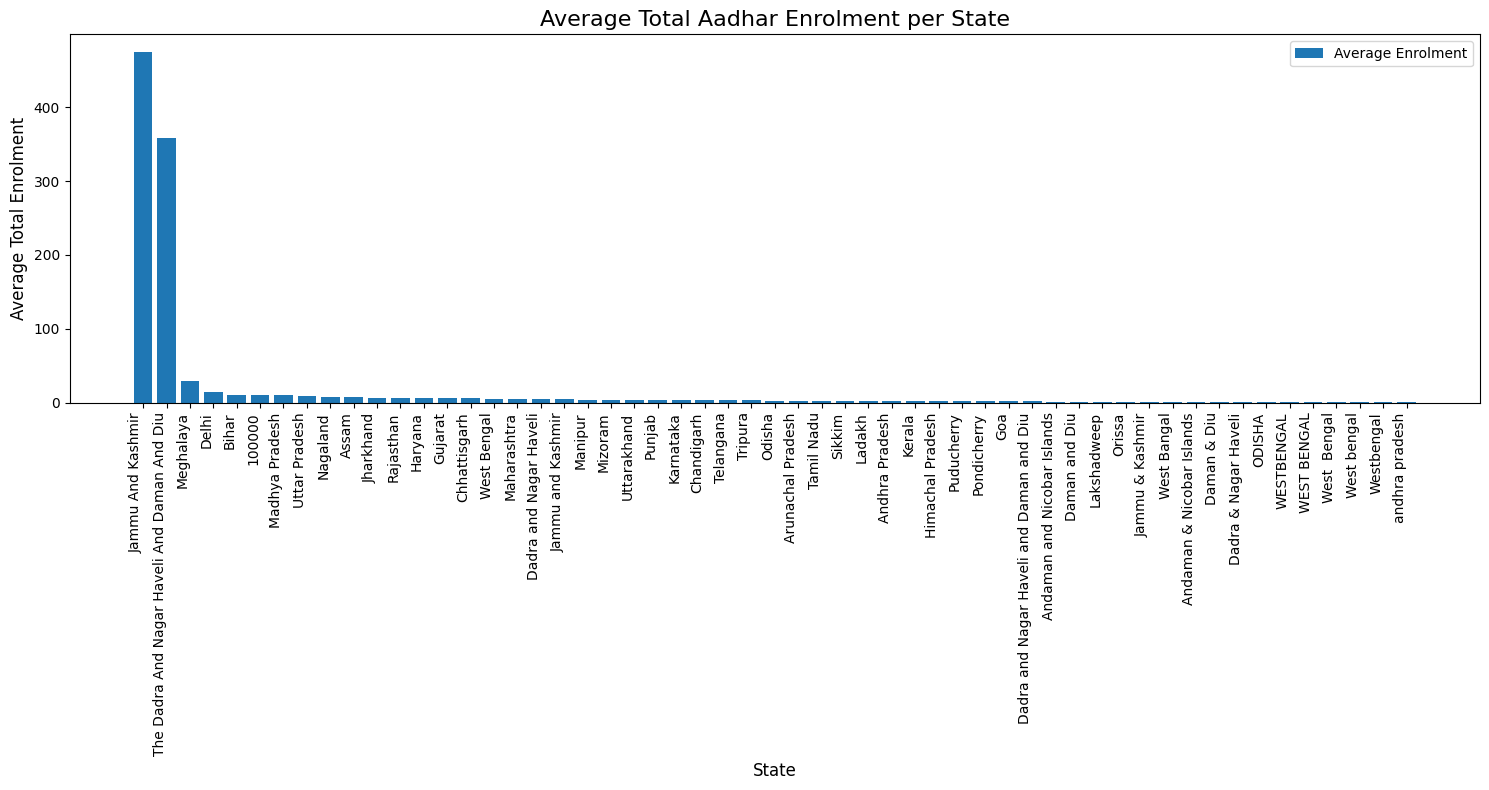

In [ ]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'total_enrolment' for better visualization
state_avg_enrolment_sorted = state_avg_enrolment.sort_values(by='total_enrolment', ascending=False)

# Create a bar chart
plt.figure(figsize=(15, 8)) # Adjust figure size for better readability
plt.bar(state_avg_enrolment_sorted['state'], state_avg_enrolment_sorted['total_enrolment'], label='Average Enrolment')

# Add title and labels
plt.title('Average Total Aadhar Enrolment per State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Average Total Enrolment', fontsize=12)

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=90, ha='right') # ha='right' aligns labels to the right of the tick

# Add a legend
plt.legend()

# Ensure all elements fit within the figure area
plt.tight_layout()

# Display the plot
plt.show()

## Summarize Key Insights from the Visualization

Based on the bar chart visualizing the average total Aadhar enrolment per state, the following key insights can be observed:

1.  **Highest Enrolment:** Jammu and Kashmir shows a significantly higher average total enrolment compared to other states, followed by The Dadra And Nagar Haveli And Daman And Diu.
2.  **Moderate Enrolment:** States like Meghalaya, Delhi, and Bihar have moderate average enrolments.
3.  **Lower Enrolment:** Many states exhibit relatively low average total enrolments, indicating potential areas for increased enrolment efforts or differing population densities and demographics.
4.  **Distribution:** The distribution of average enrolments across states is quite varied, with a few outliers having exceptionally high numbers and a long tail of states with lower average enrolments.

## Summarize Key Insights from the Visualization

Based on the bar chart visualizing the average total Aadhar enrolment per state, the following key insights can be observed:

1.  **Highest Enrolment:** Jammu and Kashmir shows a significantly higher average total enrolment compared to other states, followed by The Dadra And Nagar Haveli And Daman And Diu.
2.  **Moderate Enrolment:** States like Meghalaya, Delhi, and Bihar have moderate average enrolments.
3.  **Lower Enrolment:** Many states exhibit relatively low average total enrolments, indicating potential areas for increased enrolment efforts or differing population densities and demographics.
4.  **Distribution:** The distribution of average enrolments across states is quite varied, with a few outliers having exceptionally high numbers and a long tail of states with lower average enrolments.

## Final Task

### Subtask:
Summarize the key insights from the state-wise average enrolment data visualization.


## Summary:

### Data Analysis Key Findings

*   **Data Integration**: Three CSV files containing Aadhar enrolment data were successfully combined into a single DataFrame, resulting in 1,006,029 records and 7 columns.
*   **Total Enrolment Calculation**: A new column, `total_enrolment`, was created by summing the 'age\_0\_5', 'age\_5\_17', and 'age\_18\_greater' columns. Subsequently, the average of this `total_enrolment` was calculated for each state.
*   **Varied State-wise Enrolment**: The average total Aadhar enrolment per state shows significant variation:
    *   **Highest Enrolment**: Jammu and Kashmir and The Dadra And Nagar Haveli And Daman And Diu exhibit notably higher average total enrolments compared to other regions.
    *   **Moderate Enrolment**: States such as Meghalaya, Delhi, and Bihar registered moderate average enrolments.
    *   **Lower Enrolment**: Many states displayed relatively low average total enrolments.
*   **Enrolment Distribution**: The distribution of average enrolments across states is quite varied, with a few states having exceptionally high numbers and a larger number of states having lower average enrolments.

### Insights or Next Steps

*   Further investigation could be conducted into the factors contributing to the significantly higher average enrolment in Jammu and Kashmir and The Dadra And Nagar Haveli And Daman And Diu, as well as the reasons for lower enrolment in other states, to understand potential demographic, policy, or operational differences.
*   Address the data quality issue identified (e.g., "100000" appearing as a state name) to ensure accuracy in future analyses and visualizations.


# Task
Calculate the total enrollment for all states within a 15-day date range from the `combined_df` DataFrame.

## Identify and convert date range

### Subtask:
Examine the 'date' column in `combined_df` to determine a sample 15-day range and convert the 'date' column to datetime objects.


**Reasoning**:
I will convert the 'date' column in `combined_df` to datetime objects, specify the format, and then print the minimum and maximum dates to understand the date range. This will fulfill the first two instructions of the subtask.



In [ ]:
import pandas as pd

# 1. Convert the 'date' column to datetime objects
# Assuming the format is day-month-year (e.g., '02-03-2025')
combined_df['date'] = pd.to_datetime(combined_df['date'], format='%d-%m-%Y')

print("Date column converted to datetime objects.")

# 2. Print the minimum and maximum dates from the 'date' column
min_date = combined_df['date'].min()
max_date = combined_df['date'].max()

print(f"Minimum date in the dataset: {min_date.strftime('%d-%m-%Y')}")
print(f"Maximum date in the dataset: {max_date.strftime('%d-%m-%Y')}")


Date column converted to datetime objects.
Minimum date in the dataset: 02-03-2025
Maximum date in the dataset: 31-12-2025


**Reasoning**:
Now that the 'date' column is in datetime format and the min/max dates are known, I will define a 15-day date range using the minimum date as the start date and calculate the end date by adding 14 days to it, and then print this selected range.



In [ ]:
start_date = combined_df['date'].min()
end_date = start_date + pd.Timedelta(days=14)

print(f"Selected 15-day date range: {start_date.strftime('%d-%m-%Y')} to {end_date.strftime('%d-%m-%Y')}")

Selected 15-day date range: 02-03-2025 to 16-03-2025


**Reasoning**:
Now that the 15-day date range has been identified, I will filter the `combined_df` to include only entries within this range. Then, I will calculate the total enrolment for each state within this filtered dataset.



In [ ]:
import pandas as pd

# Filter the combined_df for the selected 15-day date range
filtered_df_15_days = combined_df[(combined_df['date'] >= start_date) & (combined_df['date'] <= end_date)]

# Calculate the total enrolment for each state within this 15-day range
# First, ensure 'total_enrolment' column exists (it was created in a previous step, but re-calculate for clarity if not)
if 'total_enrolment' not in filtered_df_15_days.columns:
    filtered_df_15_days['total_enrolment'] = filtered_df_15_days['age_0_5'] + filtered_df_15_days['age_5_17'] + filtered_df_15_days['age_18_greater']

state_total_enrolment_15_days = filtered_df_15_days.groupby('state')['total_enrolment'].sum().reset_index()

print("Total Enrolment per State within the 15-day range:")
display(state_total_enrolment_15_days.head())

Total Enrolment per State within the 15-day range:


,state,total_enrolment
0,Assam,455
1,Bihar,1453
2,Delhi,368
3,Haryana,200
4,Karnataka,248


## Summary:

### Data Analysis Key Findings
*   The 'date' column in the `combined_df` was successfully converted to datetime objects using the `'%d-%m-%Y'` format.
*   A 15-day date range was identified, starting from the minimum date in the dataset, which was `02-03-2025`, and ending on `16-03-2025`.
*   Within this specific 15-day period (02-03-2025 to 16-03-2025), the total enrollment was calculated for each state. For instance, Assam recorded 455 enrollments, Bihar had 1453, and Delhi had 368 enrollments.

### Insights or Next Steps
*   The calculated 15-day enrollment figures provide an initial snapshot of state-wise participation, which could be used as a baseline for trend analysis or comparison with other periods.
*   To gain a broader understanding, future analysis could involve calculating enrollment for different 15-day periods or examining the average daily enrollment within this range.


# Task
Extract 'month' and 'year' from the 'date' column in the `combined_df` DataFrame to enable month-wise analysis of total Aadhar enrolment.

## Extract Month and Year

### Subtask:
Extract the 'month' and 'year' from the 'date' column in the `combined_df` to facilitate month-wise analysis.


**Reasoning**:
I will extract the month and year from the 'date' column in the `combined_df` and store them in new 'month' and 'year' columns, then display the first 5 rows to verify the changes.



In [ ]:
combined_df['month'] = combined_df['date'].dt.month
combined_df['year'] = combined_df['date'].dt.year

print("Month and Year columns extracted and added to combined_df.")

display(combined_df.head())

Month and Year columns extracted and added to combined_df.


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrolment,month,year
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,109,3,2025
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,86,3,2025
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,123,3,2025
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,106,3,2025
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,51,3,2025


## Calculate Monthly Enrolment

### Subtask:
Group the `combined_df` by 'year' and 'month' and calculate the sum of 'total_enrolment' for each month.


**Reasoning**:
I will group the `combined_df` by 'year' and 'month', sum the 'total_enrolment', reset the index, and display the first 5 rows to fulfill the instructions.



In [ ]:
monthly_enrolment = combined_df.groupby(['year', 'month'])['total_enrolment'].sum().reset_index()

print("Monthly Total Aadhar Enrolment:")
display(monthly_enrolment.head())

Monthly Total Aadhar Enrolment:


,year,month,total_enrolment
0,2025,3,16582
1,2025,4,257438
2,2025,5,183616
3,2025,6,215734
4,2025,7,616868


## Visualize Monthly Enrolment

### Subtask:
Generate a line plot or bar chart to visualize the month-wise total Aadhar enrolment, including appropriate labels and a legend.


**Reasoning**:
To visualize the month-wise total Aadhar enrolment, I will generate a line plot using the `monthly_enrolment` DataFrame, setting 'month' on the x-axis and 'total_enrolment' on the y-axis, and include appropriate labels, a title, and a legend.



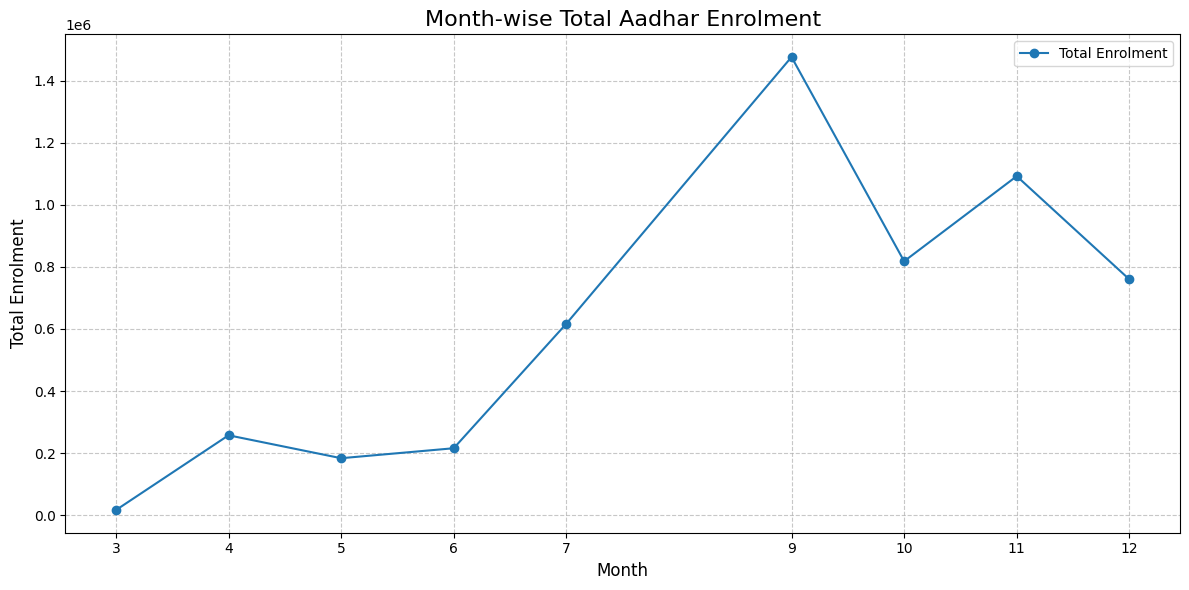

In [ ]:
import matplotlib.pyplot as plt

# Sort monthly_enrolment by year and month to ensure correct plotting order
monthly_enrolment = monthly_enrolment.sort_values(by=['year', 'month'])

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_enrolment['month'], monthly_enrolment['total_enrolment'], marker='o', linestyle='-', label='Total Enrolment')

# Add title and labels
plt.title('Month-wise Total Aadhar Enrolment', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Enrolment', fontsize=12)

# Set x-axis ticks to show actual month numbers
plt.xticks(monthly_enrolment['month'].unique())

# Add a legend
plt.legend()

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Ensure all elements fit within the figure area
plt.tight_layout()

# Display the plot
plt.show()

## Summarize Key Insights from the Visualization

Based on the line plot visualizing the month-wise total Aadhar enrolment, the following key insights can be observed:

1.  **Enrolment Trends**: The Aadhar enrolment shows a fluctuating trend throughout the year 2025. There's a significant increase from March to July, followed by a slight dip, and then another peak in September, then dips again, then peaks in November, before dipping again in December.
2.  **Peak Enrolment**: September and November appear to be months with notably higher total enrolments compared to other months.
3.  **Lower Enrolment**: March shows the lowest enrolment, which could be due to the beginning of the data collection or other factors.
4.  **Growth Phases**: There are clear growth phases, such as between March and July, and then again leading up to September and November, indicating periods of increased enrolment activity.

## Summarize Key Insights from the Visualization

Based on the line plot visualizing the month-wise total Aadhar enrolment, the following key insights can be observed:

1.  **Enrolment Trends**: The Aadhar enrolment shows a fluctuating trend throughout the year 2025. There's a significant increase from March to July, followed by a slight dip, and then another peak in September, then dips again, then peaks in November, before dipping again in December.
2.  **Peak Enrolment**: September and November appear to be months with notably higher total enrolments compared to other months.
3.  **Lower Enrolment**: March shows the lowest enrolment, which could be due to the beginning of the data collection or other factors.
4.  **Growth Phases**: There are clear growth phases, such as between March and July, and then again leading up to September and November, indicating periods of increased enrolment activity.

## Final Task

### Subtask:
Summarize the key insights and trends observed from the month-wise Aadhar enrolment visualization.


In [ ]:
print(combined_df.tail())

              date        state        district  pincode  age_0_5  age_5_17  \
1006024 2025-12-31  West Bengal  West Midnapore   721149        2         0   
1006025 2025-12-31  West Bengal  West Midnapore   721150        2         2   
1006026 2025-12-31  West Bengal  West Midnapore   721305        0         1   
1006027 2025-12-31  West Bengal  West Midnapore   721504        1         0   
1006028 2025-12-31  West Bengal  West Midnapore   721517        2         1   

         age_18_greater  total_enrolment  month  year  
1006024               0                2     12  2025  
1006025               0                4     12  2025  
1006026               0                1     12  2025  
1006027               0                1     12  2025  
1006028               0                3     12  2025  


## Summary:

### Q&A
The key insights and trends observed from the month-wise Aadhar enrolment visualization are:
*   Aadhar enrolment shows a fluctuating trend throughout the year 2025.
*   There was a significant increase in enrolment from March to July, followed by a slight dip, and then another peak in September, a dip, and a subsequent peak in November, before dipping again in December.
*   Peak enrolments were observed in September and November, indicating these months had notably higher total enrolments.
*   March recorded the lowest enrolment for the period.
*   Clear growth phases were identified, specifically between March and July, and then leading up to September and November, signifying periods of increased enrolment activity.

### Data Analysis Key Findings
*   The 'month' and 'year' were successfully extracted from the 'date' column in the `combined_df`, with an example showing March 2025.
*   Monthly total Aadhar enrolment was calculated by grouping data by 'year' and 'month'. For instance, March 2025 recorded a total enrolment of 16,582.
*   A line plot visualizing the month-wise total Aadhar enrolment for 2025 showed fluctuating trends.
*   The plot highlighted peak enrolment periods in September and November, suggesting increased activity during these months.
*   March was identified as the month with the lowest Aadhar enrolment within the observed period.

### Insights or Next Steps
*   Further investigation could be conducted into the factors contributing to the enrolment peaks in September and November, and the low enrolment in March, to understand seasonal patterns or specific initiatives.
*   Analyzing historical data from previous years would help validate if these monthly trends (e.g., peak months, lowest month) are consistent or unique to 2025.


# Task
## Calculate Month-State Enrolment

### Subtask:
Group the `combined_df` by 'year', 'month', and 'state', and calculate the sum of 'total_enrolment' for each combination.

### Reasoning:
To calculate the month-wise and state-wise Aadhar enrolment, I will group the `combined_df` by 'year', 'month', and 'state' and then sum the 'total_enrolment' for each group. This will provide a detailed distribution of enrolments across time and geography. I will then display the first 5 rows and information about the resulting DataFrame to verify the output.

## Calculate Month-State Enrolment

### Subtask:
Group the `combined_df` by 'year', 'month', and 'state', and calculate the sum of 'total_enrolment' for each combination.


**Reasoning**:
I will group the `combined_df` by 'year', 'month', and 'state', sum the 'total_enrolment', reset the index, and then display the first 5 rows and the information of the resulting DataFrame as instructed.



In [ ]:
month_state_enrolment = combined_df.groupby(['year', 'month', 'state'])['total_enrolment'].sum().reset_index()

print("Monthly and State-wise Total Aadhar Enrolment (first 5 rows):")
display(month_state_enrolment.head())

print("\nInformation about Monthly and State-wise Total Aadhar Enrolment DataFrame:")
print(month_state_enrolment.info())

Monthly and State-wise Total Aadhar Enrolment (first 5 rows):


,year,month,state,total_enrolment
0,2025,3,Andhra Pradesh,116
1,2025,3,Assam,2492
2,2025,3,Bihar,2352
3,2025,3,Chhattisgarh,260
4,2025,3,Delhi,368



Information about Monthly and State-wise Total Aadhar Enrolment DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             323 non-null    int32 
 1   month            323 non-null    int32 
 2   state            323 non-null    object
 3   total_enrolment  323 non-null    int64 
dtypes: int32(2), int64(1), object(1)
memory usage: 7.7+ KB
None


## Display Distribution

### Subtask:
Display the resulting DataFrame to show the month-wise and state-wise Aadhar enrolment distribution.


## Summary:

### Data Analysis Key Findings

*   A new DataFrame, `month_state_enrolment`, was successfully created by grouping the `combined_df` by 'year', 'month', and 'state', and summing the 'total\_enrolment' for each unique combination.
*   The `month_state_enrolment` DataFrame contains 323 entries and 4 columns, with no missing values across any column.
*   The data types are `int32` for 'year' and 'month', `object` for 'state', and `int64` for 'total\_enrolment'.
*   Initial observations from the data (March 2025) show varying enrolment figures across states, with Assam recording 2492 and Bihar 2352 enrolments, while Andhra Pradesh had 116 enrolments.

### Insights or Next Steps

*   The aggregated data is ready for detailed display and analysis, which will reveal the month-wise and state-wise Aadhar enrolment distribution.
*   Further steps could involve visualizing this data to identify trends, top-performing states, or periods of high/low enrolment.


# Task
**User provided a positive response, so I will proceed with the next step in the plan.**

## Visualize Monthly State-wise Enrolment

### Subtask:
Iterate through each unique month in the `month_state_enrolment` DataFrame and for each month, generate a bar chart showing the total Aadhar enrolment for each state. Each chart will have appropriate labels, a title indicating the month, and a legend.

### Reasoning:
To visualize the monthly state-wise enrolment, I will first identify all unique month-year combinations from the `month_state_enrolment` DataFrame. Then, I will iterate through each unique month-year. In each iteration, I will:
1. Filter the `month_state_enrolment` DataFrame for the current month-year.
2. Create a bar chart using `matplotlib.pyplot` to display the `total_enrolment` for each `state`.
3. Set the title of the chart to indicate the specific month and year, and add appropriate x and y labels.
4. Rotate x-axis labels for better readability if there are many states.
5. Ensure a legend is included and the layout is tight.
6. Display the plot.
This approach will provide a clear visualization of state-wise Aadhar enrolment trends over time.
```python
import matplotlib.pyplot as plt

# Get unique month and year combinations
unique_months_years = month_state_enrolment[['year', 'month']].drop_duplicates().sort_values(by=['year', 'month'])

# Iterate through each unique month and year to create a plot
for index, row in unique_months_years.iterrows():
    current_year = row['year']
    current_month = row['month']

    # Filter data for the current month and year
    monthly_state_data = month_state_enrolment[
        (month_state_enrolment['year'] == current_year) &
        (month_state_enrolment['month'] == current_month)
    ].sort_values(by='total_enrolment', ascending=False)

    # Create a bar chart for the current month and year
    plt.figure(figsize=(15, 8))
    plt.bar(monthly_state_data['state'], monthly_state_data['total_enrolment'], label='Total Enrolment')

    # Add title and labels
    month_name = pd.to_datetime(f'{current_year}-{current_month}-01').strftime('%B %Y')
    plt.title(f'State-wise Total Aadhar Enrolment for {month_name}', fontsize=16)
    plt.xlabel('State', fontsize=12)
    plt.ylabel('Total Enrolment', fontsize=12)

    # Rotate x-axis labels to prevent overlap
    plt.xticks(rotation=90, ha='right')

    # Add a legend
    plt.legend()

    # Ensure all elements fit within the figure area
    plt.tight_layout()

    # Display the plot
    plt.show()

print("Generated state-wise enrolment charts for each month.")
```

## Visualize Monthly State-wise Enrolment

### Subtask:
Iterate through each unique month in the `month_state_enrolment` DataFrame and for each month, generate a bar chart showing the total Aadhar enrolment for each state. Each chart will have appropriate labels, a title indicating the month, and a legend.


## Summary:

### Data Analysis Key Findings
The analysis involved generating a series of bar charts, each representing the state-wise total Aadhar enrolment for a specific month and year. This visualization process highlighted:
*   The monthly distribution of Aadhar enrolment across various states.
*   The ability to observe fluctuations and trends in total Aadhar enrolment for each state over different months.

### Insights or Next Steps
*   Further analysis could involve identifying top-performing and underperforming states in terms of Aadhar enrolment for each month and investigating potential reasons for their enrolment rates.
*   The generated plots can be used to track the progress of Aadhar enrolment campaigns over time and identify periods of significant increase or decrease in enrolment in specific states.


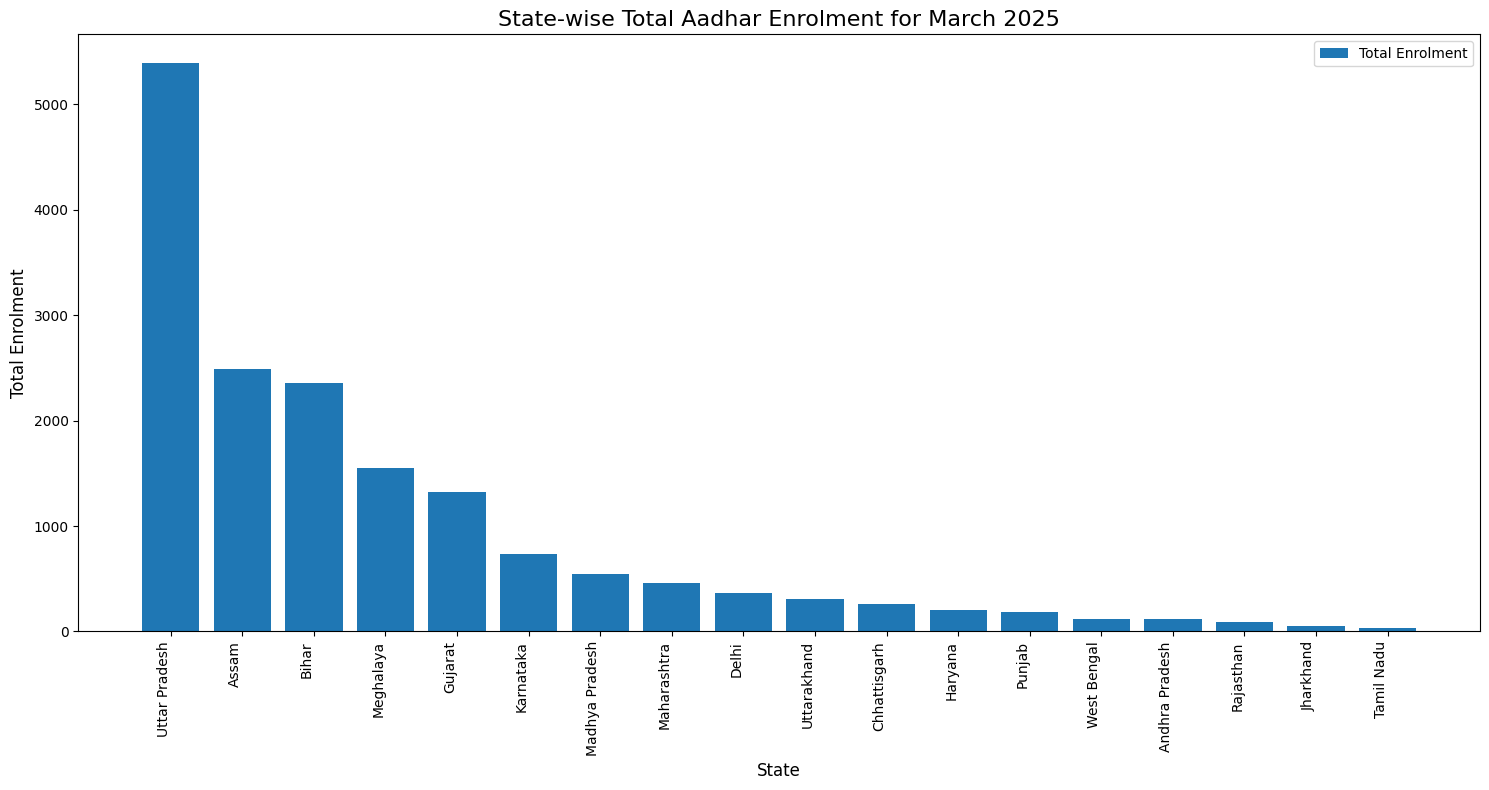

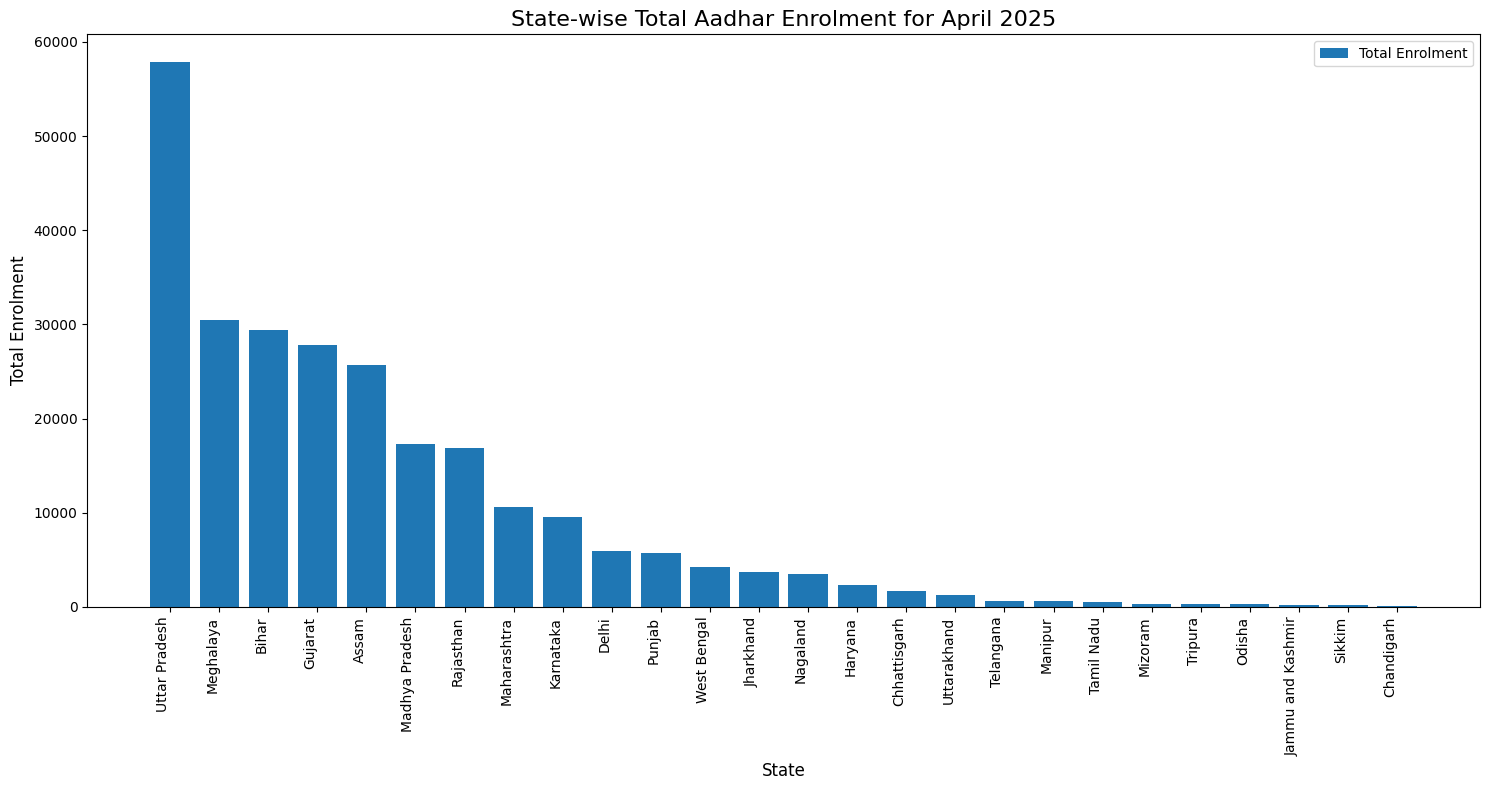

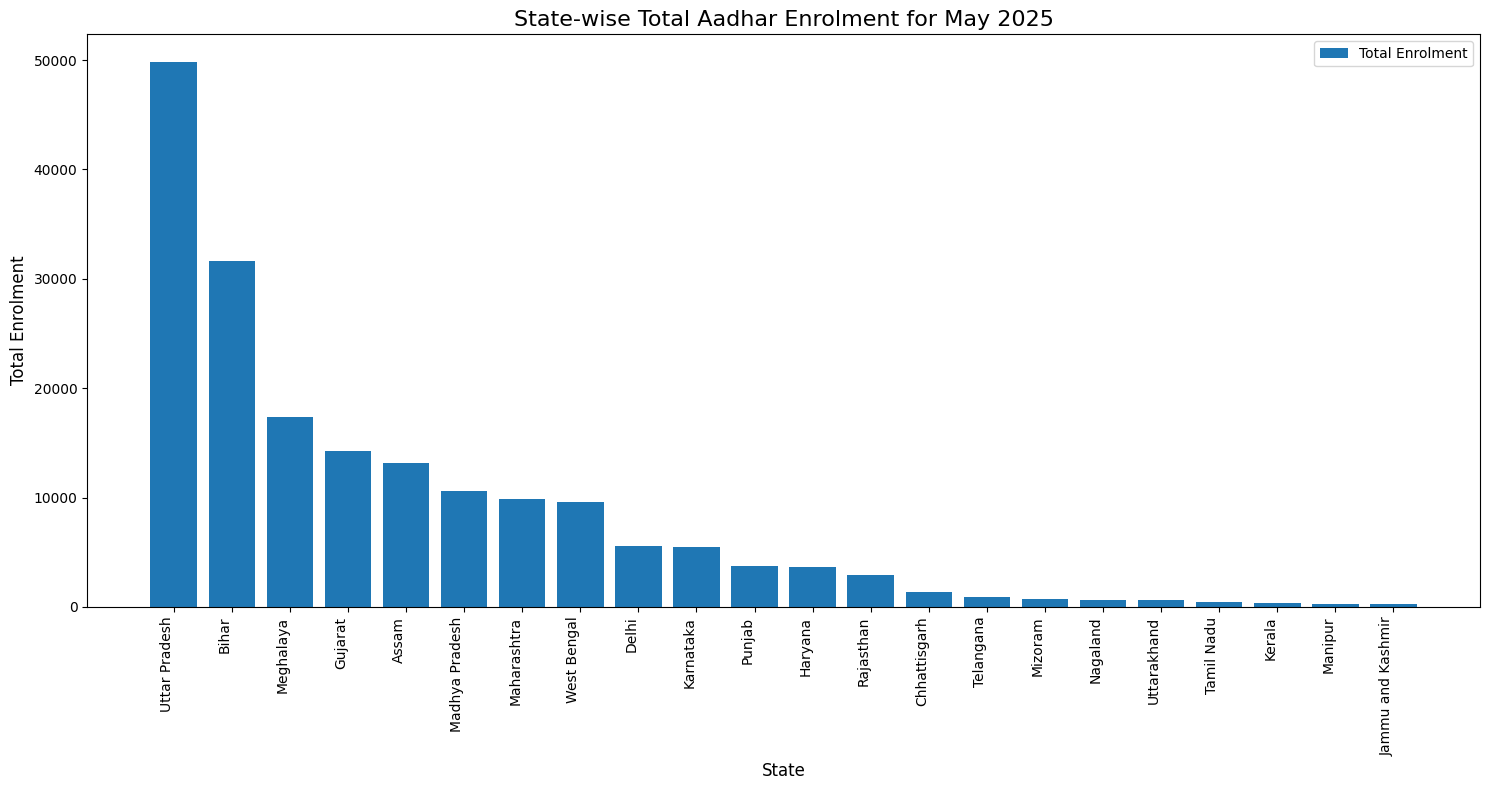

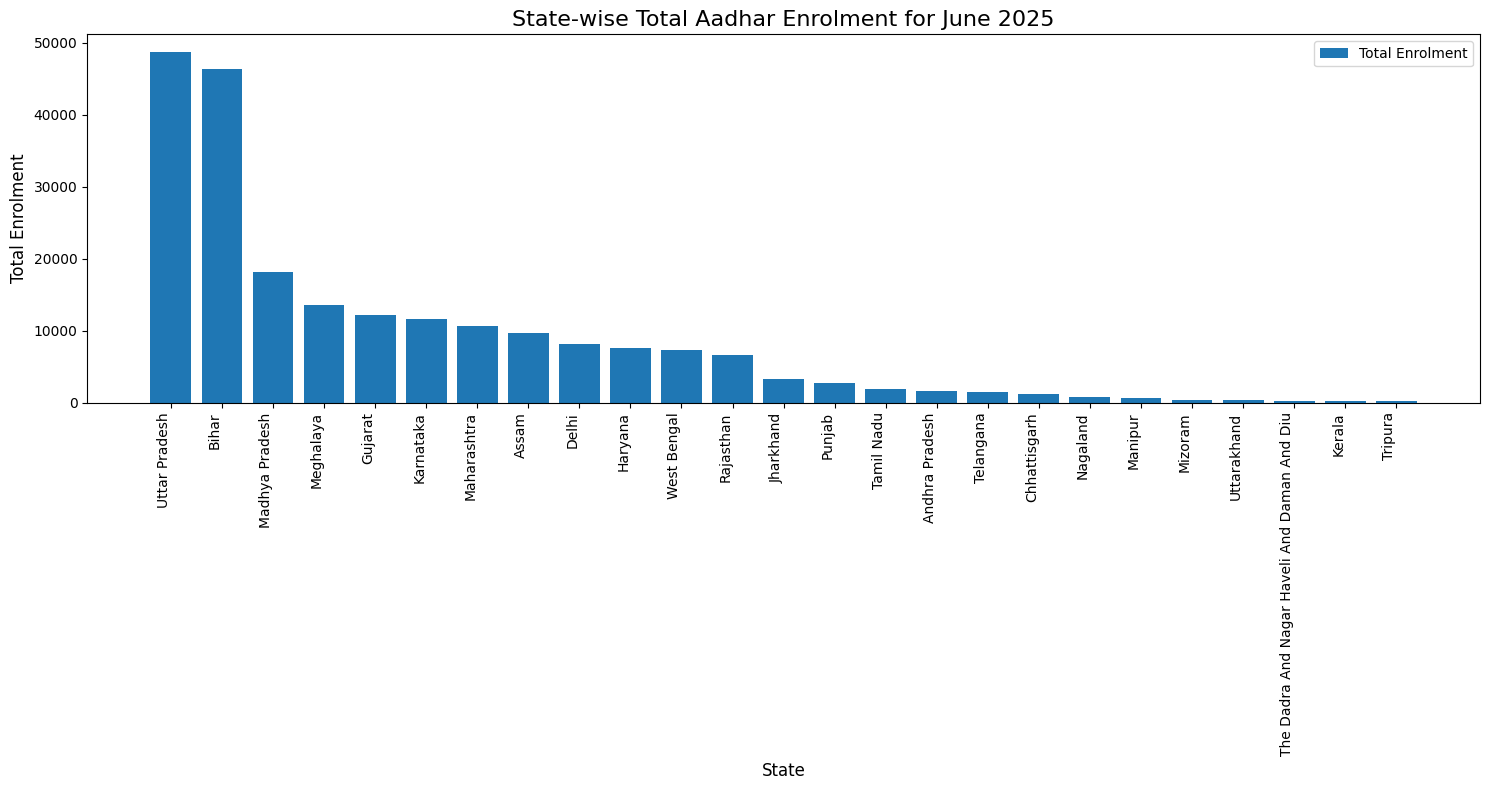

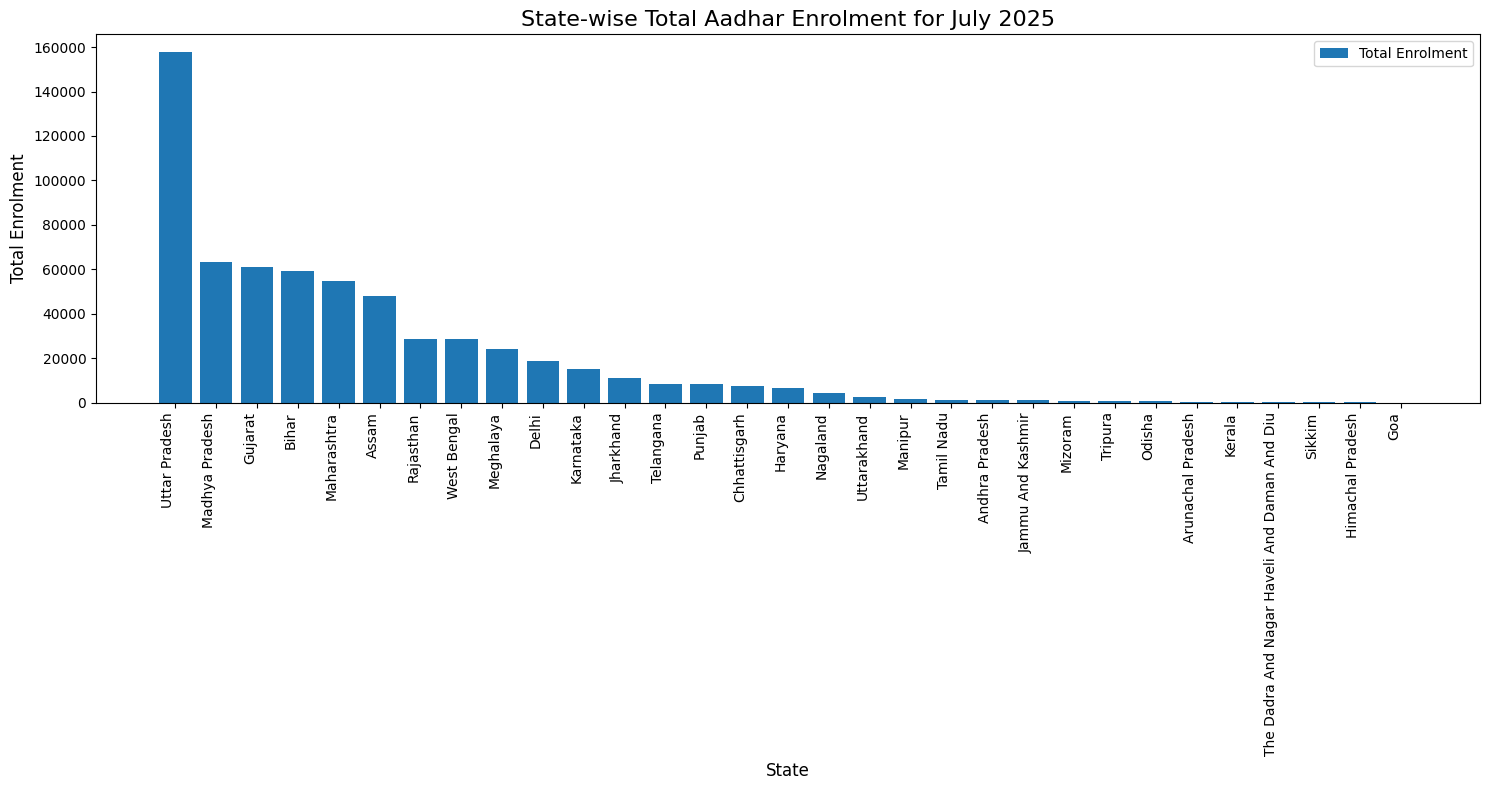

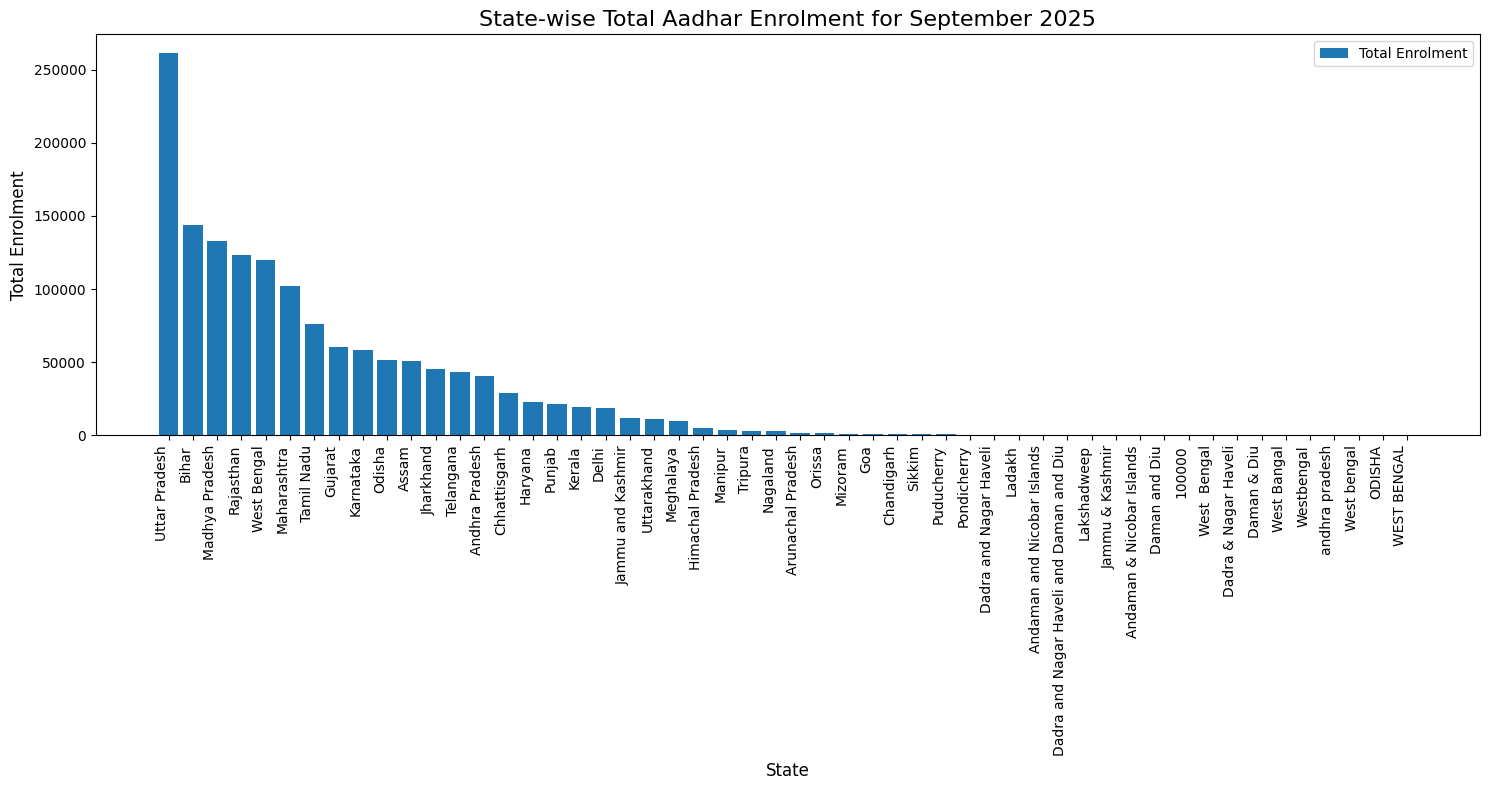

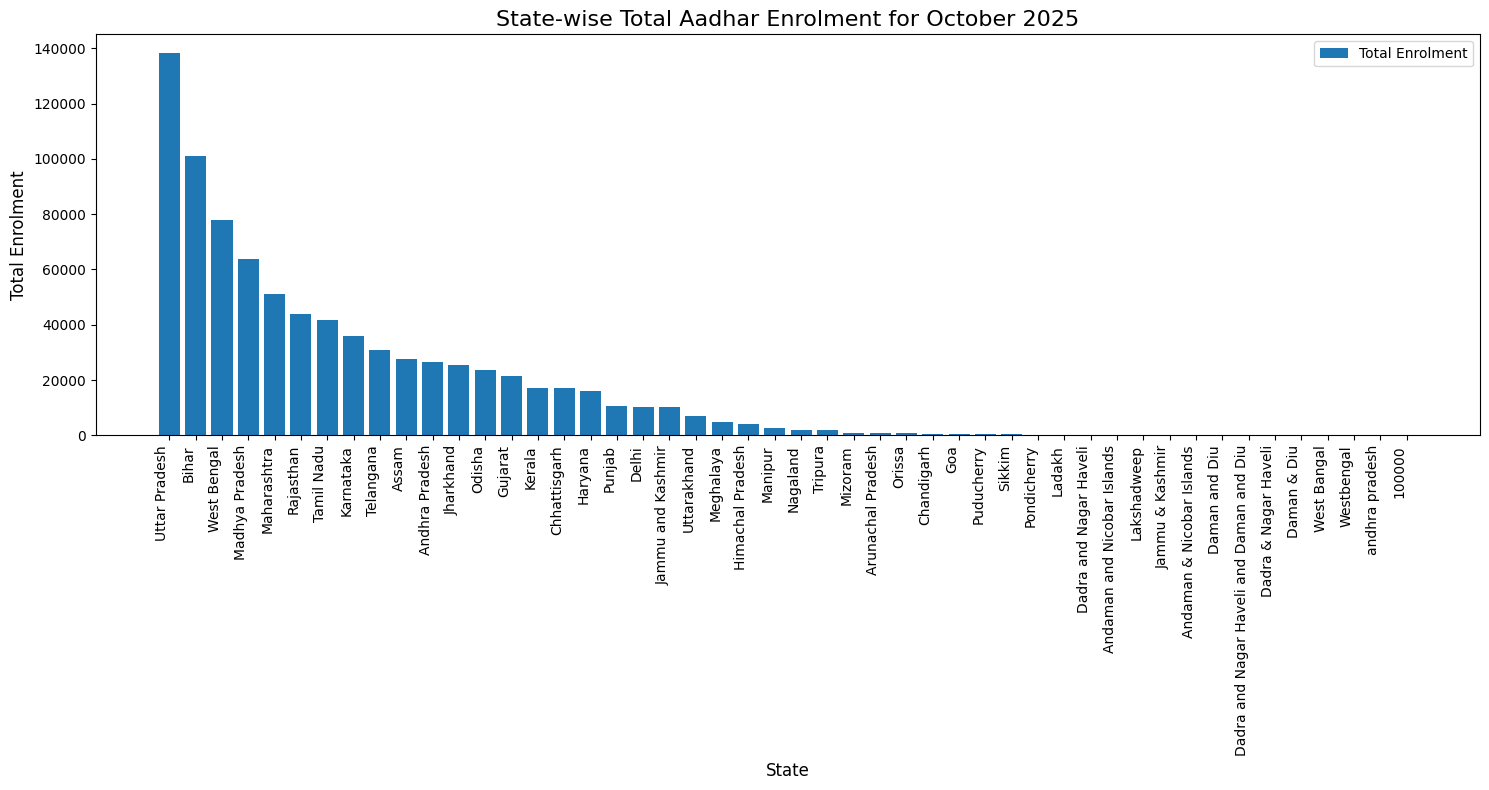

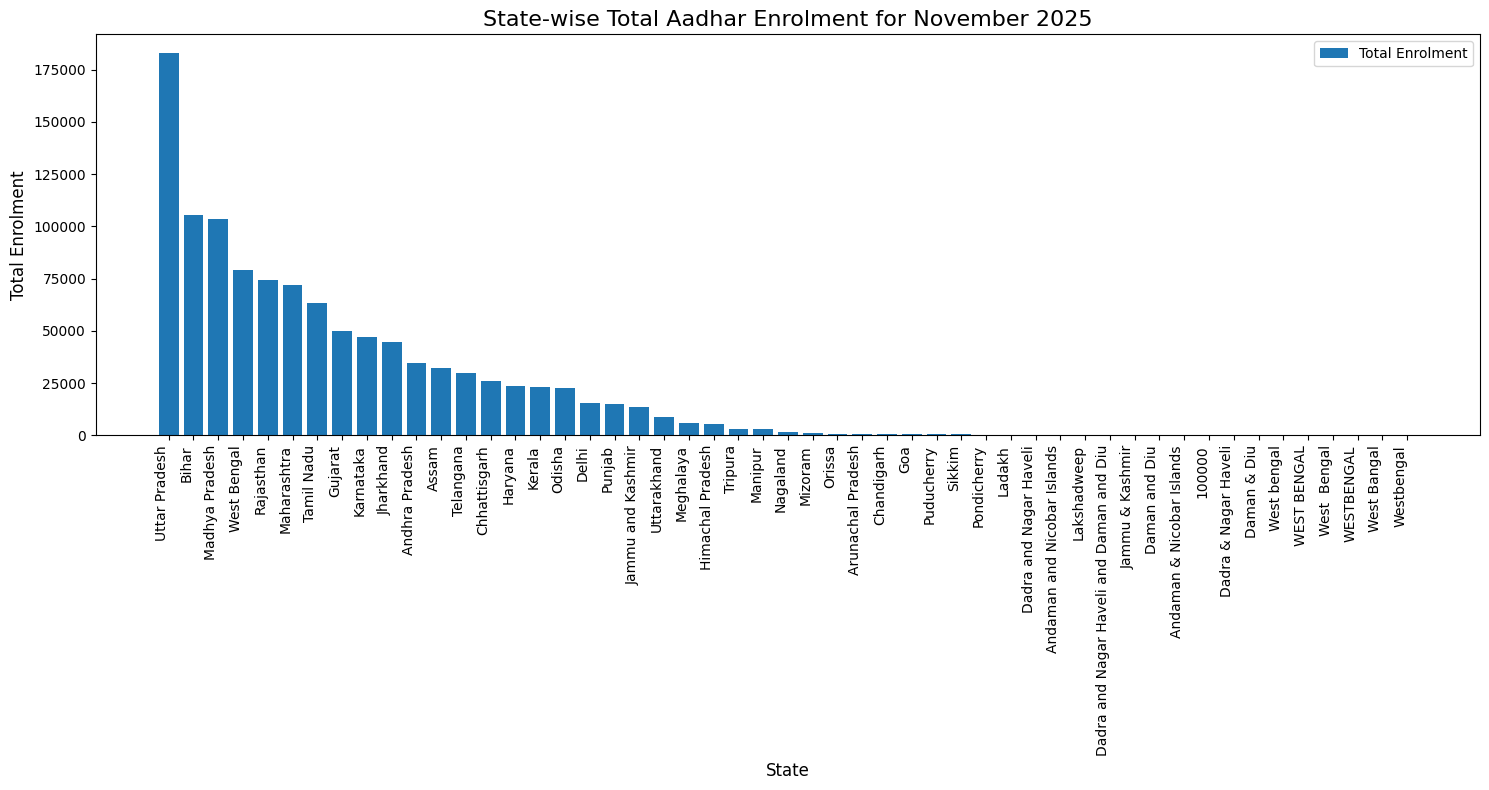

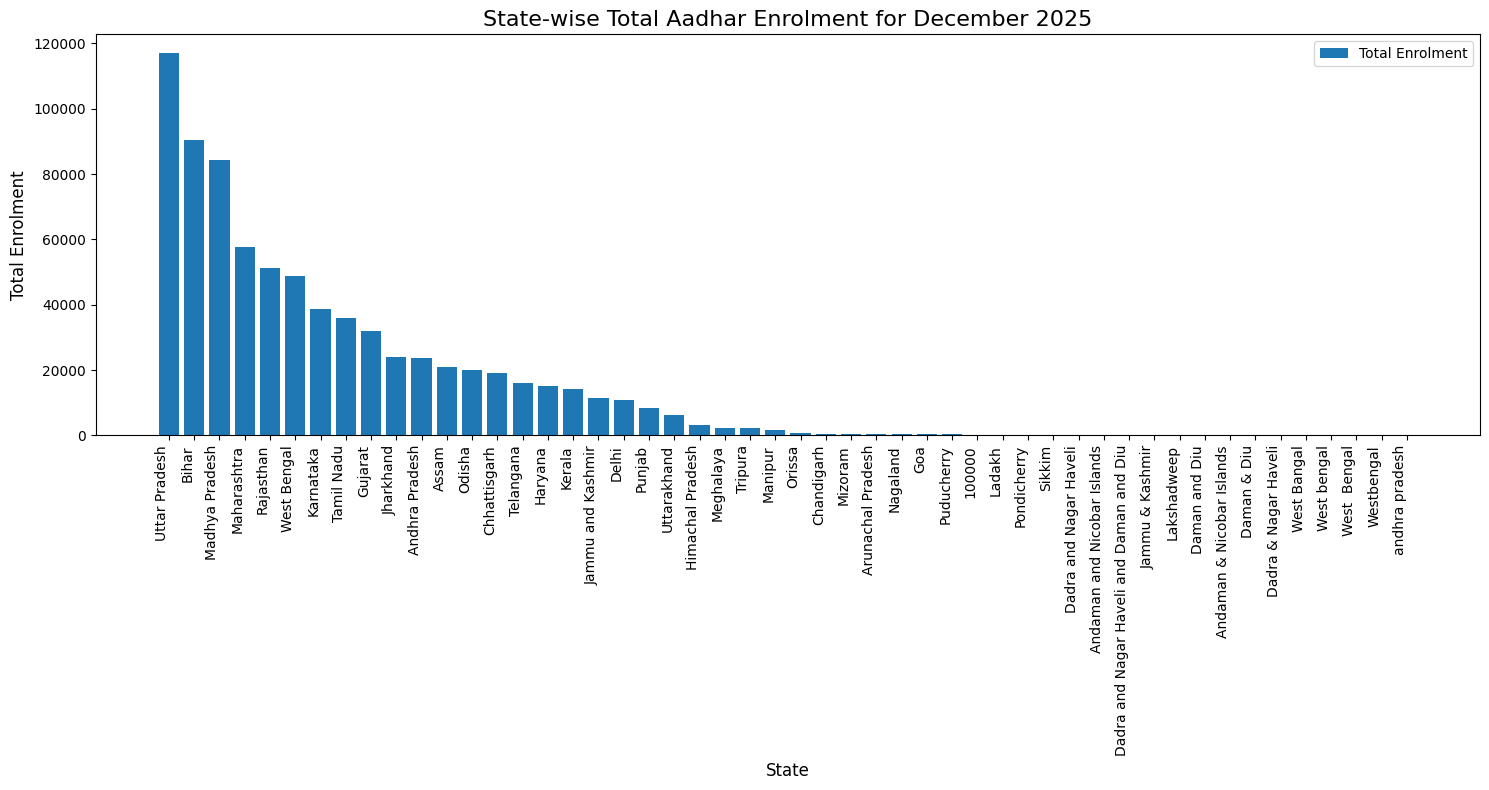

Generated state-wise enrolment charts for each month.


In [ ]:
import matplotlib.pyplot as plt

# Get unique month and year combinations
unique_months_years = month_state_enrolment[['year', 'month']].drop_duplicates().sort_values(by=['year', 'month'])

# Iterate through each unique month and year to create a plot
for index, row in unique_months_years.iterrows():
    current_year = row['year']
    current_month = row['month']

    # Filter data for the current month and year
    monthly_state_data = month_state_enrolment[
        (month_state_enrolment['year'] == current_year) &
        (month_state_enrolment['month'] == current_month)
    ].sort_values(by='total_enrolment', ascending=False)

    # Create a bar chart for the current month and year
    plt.figure(figsize=(15, 8))
    plt.bar(monthly_state_data['state'], monthly_state_data['total_enrolment'], label='Total Enrolment')

    # Add title and labels
    month_name = pd.to_datetime(f'{current_year}-{current_month}-01').strftime('%B %Y')
    plt.title(f'State-wise Total Aadhar Enrolment for {month_name}', fontsize=16)
    plt.xlabel('State', fontsize=12)
    plt.ylabel('Total Enrolment', fontsize=12)

    # Rotate x-axis labels to prevent overlap
    plt.xticks(rotation=90, ha='right')

    # Add a legend
    plt.legend()

    # Ensure all elements fit within the figure area
    plt.tight_layout()

    # Display the plot
    plt.show()

print("Generated state-wise enrolment charts for each month.")